In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from plotting_functions import nn_plot_acc
from enkf_functions import enkf_classifier_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu

In [4]:
X_train, X_test, y_train, y_test = mnist_prep()

In [5]:
# old settings -> the corresponding model shall be extended
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 5000,    # X_train.shape[0]
                "h_0": 2,
                "delta": 0.005,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 10

In [6]:
particle_list = [100, 200, 500]

In [7]:
import time

Epoch 21. Training Accuracy: 0.454, Test Accuracy: 0.461.
Epoch 22. Training Accuracy: 0.455, Test Accuracy: 0.461.
Epoch 23. Training Accuracy: 0.456, Test Accuracy: 0.461.
Epoch 24. Training Accuracy: 0.457, Test Accuracy: 0.462.
Epoch 25. Training Accuracy: 0.457, Test Accuracy: 0.463.
Epoch 26. Training Accuracy: 0.458, Test Accuracy: 0.464.
Epoch 27. Training Accuracy: 0.458, Test Accuracy: 0.464.
Epoch 28. Training Accuracy: 0.459, Test Accuracy: 0.464.
Epoch 29. Training Accuracy: 0.459, Test Accuracy: 0.465.
Epoch 30. Training Accuracy: 0.46, Test Accuracy: 0.466.
Calculation time for 100 particles: 28.215050896008808 minutes.


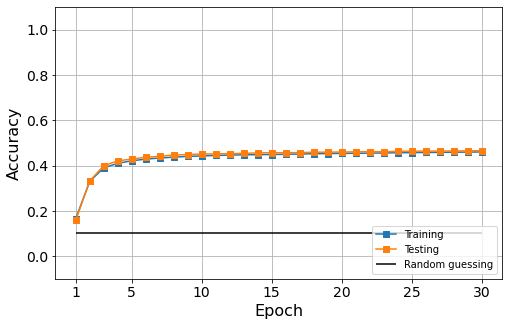

Epoch 21. Training Accuracy: 0.564, Test Accuracy: 0.567.
Epoch 22. Training Accuracy: 0.564, Test Accuracy: 0.567.
Epoch 23. Training Accuracy: 0.564, Test Accuracy: 0.568.
Epoch 24. Training Accuracy: 0.565, Test Accuracy: 0.568.
Epoch 25. Training Accuracy: 0.566, Test Accuracy: 0.569.
Epoch 26. Training Accuracy: 0.566, Test Accuracy: 0.57.
Epoch 27. Training Accuracy: 0.566, Test Accuracy: 0.57.
Epoch 28. Training Accuracy: 0.566, Test Accuracy: 0.571.
Epoch 29. Training Accuracy: 0.567, Test Accuracy: 0.571.
Epoch 30. Training Accuracy: 0.567, Test Accuracy: 0.572.
Calculation time for 200 particles: 66.28281135161718 minutes.


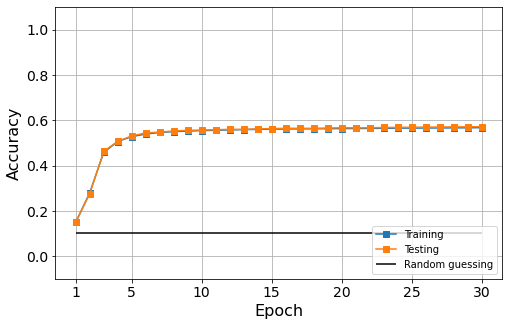

Epoch 21. Training Accuracy: 0.761, Test Accuracy: 0.765.
Epoch 22. Training Accuracy: 0.762, Test Accuracy: 0.766.
Epoch 23. Training Accuracy: 0.763, Test Accuracy: 0.768.
Epoch 24. Training Accuracy: 0.764, Test Accuracy: 0.77.
Epoch 25. Training Accuracy: 0.765, Test Accuracy: 0.771.
Epoch 26. Training Accuracy: 0.766, Test Accuracy: 0.773.
Epoch 27. Training Accuracy: 0.767, Test Accuracy: 0.773.
Epoch 28. Training Accuracy: 0.767, Test Accuracy: 0.774.
Epoch 29. Training Accuracy: 0.768, Test Accuracy: 0.775.
Epoch 30. Training Accuracy: 0.769, Test Accuracy: 0.775.
Calculation time for 500 particles: 362.32494922876356 minutes.


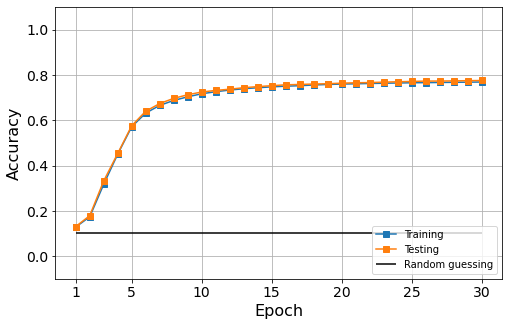

In [8]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

    start_time = time.time()    
    mean_model = enkf_classifier_extension(extend_model = "../models/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                           additional_epochs = additional_epochs,
                                           save_all = True,
                                           verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    nn_plot_acc(mean_model,
                mean_comparison = 0.1,
                start_epoch = 1,
                savefig = True,
                file = "../img/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], p, setting_dict["h_0"]))

In [9]:
obj_dict = load_objects("../objects/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [10]:
final_model = nn_load("../models/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))